___

#### Rick Fontenot, Joe Lazarus, Puri Rudick
####
___


## This first section is a copy of the tensorflow tutorial to confirm setup, reference:
https://www.tensorflow.org/tutorials/keras/classification

Load the Tensorflow Library

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [5]:
train_images.shape


(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [6]:
len(train_labels)


60000

Each label is an integer between 0 and 9:

In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [9]:
len(test_labels)

10000

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

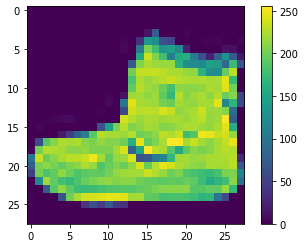

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

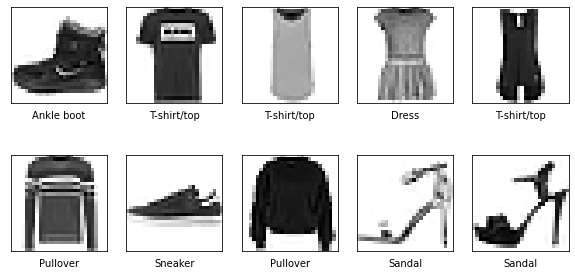

In [12]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Add Hierarchical class labels to the training and test sets 

In [13]:
import pandas as pd

train100_labels = pd.DataFrame(train_labels)
train100_labels = train100_labels.rename(columns={train100_labels.columns[0]: 'label'})

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
d = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

train100_labels['fine_label'] = replace_all(train100_labels['label'], d)

train100_labels.head(20)

,label,fine_label
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top
5,2,Pullover
6,7,Sneaker
7,2,Pullover
8,5,Sandal
9,5,Sandal


In [14]:
medium_dictionary = {'T-shirt/top': 'Tops', 'Trouser': 'Bottoms', 'Pullover': 'Tops', 'Dress': 'Dresses', 'Coat': 'Outers', 'Sandal': 'Shoes', 'Shirt': 'Tops', 'Sneaker': 'Shoes', 'Bag': 'Accessories', 'Ankle boot': 'Shoes'}
train100_labels['medium_label']= train100_labels['fine_label'].map(medium_dictionary)

coarse_dictionary = {'Tops': 'Clothes', 'Bottoms': 'Clothes', 'Dresses': 'Clothes', 'Outers': 'Clothes', 'Shoes': 'Goods', 'Accessories': 'Goods'}
train100_labels['coarse_label']= train100_labels['medium_label'].map(coarse_dictionary)

train100_images_flattened = pd.DataFrame(train_images.flatten().reshape(60000, 784))

train100 = pd.concat([train100_labels, train100_images_flattened], axis=1)

train100.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.003922,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import pandas as pd

test_labels = pd.DataFrame(test_labels)
test_labels = test_labels.rename(columns={test_labels.columns[0]: 'label'})

test_labels['fine_label'] = replace_all(test_labels['label'], d)
test_labels['medium_label']= test_labels['fine_label'].map(medium_dictionary)
test_labels['coarse_label']= test_labels['medium_label'].map(coarse_dictionary)

test_images_flattened = pd.DataFrame(test_images.flatten().reshape(10000, 784))

test = pd.concat([test_labels, test_images_flattened], axis=1)

test.head(20)

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.007843,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.643137,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.278431,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.568627,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.141176,0.117647,0.105882,0.105882,0.000000,0.000000,0.0,0.0
7,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.039216,0.000000,0.000000,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## Stratified split of training set into 90% train, 10% validation
### Validation can be used for early stopping on models 3,4,5
### and for tuning on model 5
### Once stopping criteria and hyperparameters determined, re-fit with full training set before predictions

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, holdback_index in split.split(train100, train100.label):
    train90 = train100.iloc[train_index]
    validation10 = train100.iloc[holdback_index]


In [17]:
print("90% Training set \n",train90['fine_label'].value_counts())
print("10% Validation set \n",validation10['fine_label'].value_counts())



90% Training set 
 Bag            5400
Ankle boot     5400
T-shirt/top    5400
Trouser        5400
Coat           5400
Shirt          5400
Sandal         5400
Sneaker        5400
Dress          5400
Pullover       5400
Name: fine_label, dtype: int64
10% Validation set 
 Dress          600
Trouser        600
Ankle boot     600
Bag            600
Pullover       600
Coat           600
T-shirt/top    600
Shirt          600
Sandal         600
Sneaker        600
Name: fine_label, dtype: int64


In [18]:
train90_images_flattened = train90.iloc[:,4:784].values
validation10_images_flattened = validation10.iloc[:,4:784].values


In [20]:
train90_images_flattened

array([[0.        , 0.        , 0.        , ..., 0.54509804, 0.5254902 ,
        0.48235294],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.63529412, 0.08627451,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19215686],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Model 1
## Base "Flat" model with no early stopping criteria

Use full training set since no stopping or tuning. Images are already flattened so just include single dense hidden layer plus output layer

In [359]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile Model 1

Use Sparse Categorical Cross entropy loss function with accuracy as the metric

In [360]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train Model 1
Using full training set with pre-flattened images and 10 epochs

Note the labels are converted to an array instead of df column to speed up training time

In [361]:
from datetime import datetime

model1_start_time = datetime.now()
model1.fit(train100_images_flattened, np.asarray(train100.label), epochs=10)
model1_end_time = datetime.now()
model1_train_time = model1_end_time - model1_start_time
print("Model 1 Training Time = ",model1_train_time)


Epoch 1/10
  10/1875 [..............................] - ETA: 11s - loss: 1.8456 - accuracy: 0.4250  

2022-05-18 18:50:54.227757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4954 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3757 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3382 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3140 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2960 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2801 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2686 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2601 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2476 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2422 - accur

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

## Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [362]:
model1_probbabilities = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
model1_predictions = model1_probbabilities.predict(test_images_flattened)
model1_prediction_label = np.argmax(model1_predictions, axis=1)

2022-05-18 18:52:21.580149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [363]:
model1_prediction_label[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### Add Hierarchical labels to model 1 predictions

In [364]:
import pandas as pd

model1_prediction_labels = pd.DataFrame(model1_prediction_label)
model1_prediction_labels = model1_prediction_labels.rename(columns={model1_prediction_labels.columns[0]: 'label'})

model1_prediction_labels['fine_prediction'] = replace_all(model1_prediction_labels['label'], d)
model1_prediction_labels['medium_prediction']= model1_prediction_labels['fine_prediction'].map(medium_dictionary)
model1_prediction_labels['coarse_prediction']= model1_prediction_labels['medium_prediction'].map(coarse_dictionary)

model1_prediction_labels.head(10)

,label,fine_prediction,medium_prediction,coarse_prediction
0,9,Ankle boot,Shoes,Goods
1,2,Pullover,Tops,Clothes
2,1,Trouser,Bottoms,Clothes
3,1,Trouser,Bottoms,Clothes
4,6,Shirt,Tops,Clothes
5,1,Trouser,Bottoms,Clothes
6,4,Coat,Outers,Clothes
7,6,Shirt,Tops,Clothes
8,5,Sandal,Shoes,Goods
9,7,Sneaker,Shoes,Goods


## Model 1 : Overall Classification Report & Accuracy:

In [365]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model1_fine_accuracy = accuracy_score(test_labels.fine_label, model1_prediction_labels.fine_prediction)
model1_medium_accuracy = accuracy_score(test_labels.medium_label, model1_prediction_labels.medium_prediction)
model1_coarse_accuracy = accuracy_score(test_labels.coarse_label, model1_prediction_labels.coarse_prediction)

print("Fine Level Accuracy = ",model1_fine_accuracy)
print("Medium Level Accuracy = ",model1_medium_accuracy)
print("Coarse Level Accuracy = ",model1_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(test_labels.fine_label,model1_prediction_labels.fine_prediction, 
                            target_names=class_names))

Fine Level Accuracy =  0.8888
Medium Level Accuracy =  0.938
Coarse Level Accuracy =  0.9959


Fine Level Classification Report 
               precision    recall  f1-score   support

 T-shirt/top       0.97      0.96      0.96      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.84      0.81      1000
       Dress       0.86      0.90      0.88      1000
        Coat       0.80      0.80      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.72      0.71      0.71      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.86      0.82      0.84      1000
  Ankle boot       1.00      0.96      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [366]:
summary = pd.DataFrame(columns = ["Model","Train Time", "Coarse Acc", "Medium Acc","Fine Acc"])
summary.loc[len(summary.index)] = ["1-Flat", round(model1_train_time.total_seconds()), model1_coarse_accuracy*100, model1_medium_accuracy*100, model1_fine_accuracy*100]
summary

,Model,Train Time,Coarse Acc,Medium Acc,Fine Acc
0,1-Flat,88,99.59,93.8,88.88


# Model 2 : First Hierarchical model
## All models to use matching single dense layer as model 1, no early stopping, full training set



Based on Hierarchical Structure of this dataset there will be 5 models:

A) model2_coarse : will predict either "Clothes" or "Goods"
B) model2_clothes : will predict "Tops" , "Bottoms", "Dresses", "Outers" --> note only Tops needs further modeling
C) model2_goods : will predict "Accessories" or "Shoes
D) model2_tops : will predict "T-shirt/Top", "Pullover", "Shirt"
E) model2_shoes : will predict "Sandal", "Sneaker", "Ankle Boot"

For the medium level labels:
4 labels come from model2_clothes
2 labels come from model2_goods
Total 6 labels

For the fine level labels:
If model2_clothes = Bottoms then model2.fine_label = Trouser
If model2_clothes = Dresses then model2.fine_label = Dress
If model2_clothes = Outers then model2.fine_label = Coat
If model2_goods = Accessories then model2.fine_label = Bag
3 labels come from model2_tops
3 labels come from model2_shoes
Total 10 labels

Based on framework described above, the following training subsets need to be created:

train100_clothes --> subset train100.coarse_label == "Clothes" should have 36,000 rows
train100_goods --> subset train100.coarse_label == "Goods" should have 24,000 rows
train100_tops --> subset train100.medium_label == "Tops" should have 18,000 rows
train100_shoes --> subset train100.medium_label == "Shoes" should have 18,000 rows

** Note the 1st coarse model just uses the full training set, no subset needed

In [367]:
train100_clothes = train100[train100.coarse_label == "Clothes"]
print("Clothes # Rows = ",train100_clothes.shape[0])
train100_goods = train100[train100.coarse_label == "Goods"]
print("Goods # Rows = ",train100_goods.shape[0])
train100_tops = train100[train100.medium_label == "Tops"]
print("Tops # Rows = ",train100_tops.shape[0])
train100_shoes = train100[train100.medium_label == "Shoes"]
print("Shoes # Rows = ",train100_shoes.shape[0])

Clothes # Rows =  36000
Goods # Rows =  24000
Tops # Rows =  18000
Shoes # Rows =  18000


Create "X" with just the flattened image columns for each training set

In [368]:
train100_clothes_flattened = train100_clothes.iloc[:,4:784].values
train100_goods_flattened = train100_goods.iloc[:,4:784].values
train100_tops_flattened = train100_tops.iloc[:,4:784].values
train100_shoes_flattened = train100_shoes.iloc[:,4:784].values



### Setup Model 2 matching format of Model 1
### Model 2 Coarse level model

In [369]:
model2_coarse = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model2_coarse.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [370]:
coarse_ints = {'Clothes': 0, 'Goods': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_course_labels = np.asarray(train100['coarse_label'].map(coarse_ints))

In [371]:
from datetime import datetime

model2_coarse_start_time = datetime.now()
model2_coarse.fit(train100_images_flattened, model2_course_labels, epochs=10)
model2_coarse__end_time = datetime.now()
model2_coarse__train_time = model2_coarse__end_time - model2_coarse_start_time
print("Model-2-Coarse Training Time = ",model2_coarse__train_time)

Epoch 1/10
   7/1875 [..............................] - ETA: 16s - loss: 0.2471 - accuracy: 0.9107 

2022-05-18 18:52:24.630938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0394 - accuracy: 0.9895
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0174 - accuracy: 0.9951
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9957
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0082 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0065 - accurac

### Model 2 Clothes level model

In [372]:
train100_clothes['medium_label'].value_counts()

Tops       18000
Dresses     6000
Bottoms     6000
Outers      6000
Name: medium_label, dtype: int64

In [373]:
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_clothes_labels = np.asarray(train100_clothes['medium_label'].map(clothes_ints))

In [374]:
model2_clothes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model2_clothes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [375]:
from datetime import datetime

model2_clothes_start_time = datetime.now()
model2_clothes.fit(train100_clothes_flattened, model2_clothes_labels, epochs=10)
model2_clothes_end_time = datetime.now()
model2_clothes_train_time = model2_clothes_end_time - model2_clothes_start_time
print("Model-2-Clothes Training Time = ",model2_clothes_train_time)

Epoch 1/10
  27/1125 [..............................] - ETA: 4s - loss: 0.7965 - accuracy: 0.6968

2022-05-18 18:53:40.385783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1125/1125 [==============================] - 4s 4ms/step - loss: 0.3684 - accuracy: 0.8549
Epoch 2/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.2865 - accuracy: 0.8898
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2585 - accuracy: 0.9005
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.2431 - accuracy: 0.9067
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.2301 - accuracy: 0.9116
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.2198 - accuracy: 0.9151
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.2139 - accuracy: 0.9188
Epoch 8/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2044 - accuracy: 0.9213
Epoch 9/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1980 - accuracy: 0.9249
Epoch 10/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.1903 - accurac

### Model 2 Goods level model

In [376]:
train100_goods['medium_label'].value_counts()

Shoes          18000
Accessories     6000
Name: medium_label, dtype: int64

In [377]:
goods_ints = {'Shoes': 0, 'Accessories': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_goods_labels = np.asarray(train100_goods['medium_label'].map(goods_ints))

In [378]:
model2_goods = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model2_goods.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [379]:
from datetime import datetime

model2_goods_start_time = datetime.now()
model2_goods.fit(train100_goods_flattened, model2_goods_labels, epochs=10)
model2_goods_end_time = datetime.now()
model2_goods_train_time = model2_goods_end_time - model2_goods_start_time
print("Model-2-Goods Training Time = ",model2_goods_train_time)

Epoch 1/10
 22/750 [..............................] - ETA: 3s - loss: 0.2389 - accuracy: 0.9403

2022-05-18 18:54:21.956941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 3s 4ms/step - loss: 0.0277 - accuracy: 0.9930
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0127 - accuracy: 0.9963
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0074 - accuracy: 0.9978
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0063 - accuracy: 0.9982
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0043 - accuracy: 0.9983
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9990
Epoch 8/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 9/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 10/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Model-2-Go

### Model 2 Tops level model

In [380]:
train100_tops['fine_label'].value_counts()

T-shirt/top    6000
Pullover       6000
Shirt          6000
Name: fine_label, dtype: int64

In [381]:
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_tops_labels = np.asarray(train100_tops['fine_label'].map(tops_ints))

In [382]:
model2_tops = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model2_tops.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [383]:
from datetime import datetime

model2_tops_start_time = datetime.now()
model2_tops.fit(train100_tops_flattened, model2_tops_labels, epochs=10)
model2_tops_end_time = datetime.now()
model2_tops_train_time = model2_tops_end_time - model2_tops_start_time
print("Model-2-Tops Training Time = ",model2_tops_train_time)

Epoch 1/10
 10/563 [..............................] - ETA: 3s - loss: 0.9952 - accuracy: 0.5312  

2022-05-18 18:54:50.317142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/563 [==============================] - 3s 4ms/step - loss: 0.5373 - accuracy: 0.7746
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4340 - accuracy: 0.8209
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.4037 - accuracy: 0.8319
Epoch 4/10
563/563 [==============================] - 3s 5ms/step - loss: 0.3849 - accuracy: 0.8366
Epoch 5/10
563/563 [==============================] - 3s 5ms/step - loss: 0.3679 - accuracy: 0.8452
Epoch 6/10
563/563 [==============================] - 3s 5ms/step - loss: 0.3521 - accuracy: 0.8516
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3459 - accuracy: 0.8550
Epoch 8/10
563/563 [==============================] - 4s 6ms/step - loss: 0.3329 - accuracy: 0.8616
Epoch 9/10
563/563 [==============================] - 2s 4ms/step - loss: 0.3289 - accuracy: 0.8594
Epoch 10/10
563/563 [==============================] - 3s 5ms/step - loss: 0.3206 - accuracy: 0.8667
Model-2-To

### Model 2 Shoes level model

In [384]:
train100_shoes['fine_label'].value_counts()

Ankle boot    6000
Sneaker       6000
Sandal        6000
Name: fine_label, dtype: int64

In [385]:
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model2_shoes_labels = np.asarray(train100_shoes['fine_label'].map(shoes_ints))

In [386]:
model2_shoes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model2_shoes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [387]:
from datetime import datetime

model2_shoes_start_time = datetime.now()
model2_shoes.fit(train100_shoes_flattened, model2_shoes_labels, epochs=10)
model2_shoes_end_time = datetime.now()
model2_shoes_train_time = model2_shoes_end_time - model2_shoes_start_time
print("Model-2-Shoes Training Time = ",model2_shoes_train_time)

Epoch 1/10
 21/563 [>.............................] - ETA: 2s - loss: 0.7441 - accuracy: 0.6577

2022-05-18 18:55:17.025458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/563 [==============================] - 3s 5ms/step - loss: 0.2582 - accuracy: 0.9087
Epoch 2/10
563/563 [==============================] - 3s 5ms/step - loss: 0.1551 - accuracy: 0.9456
Epoch 3/10
563/563 [==============================] - 3s 5ms/step - loss: 0.1292 - accuracy: 0.9539
Epoch 4/10
563/563 [==============================] - 3s 5ms/step - loss: 0.1123 - accuracy: 0.9585
Epoch 5/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1024 - accuracy: 0.9633
Epoch 6/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0934 - accuracy: 0.9664
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0827 - accuracy: 0.9698
Epoch 8/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0784 - accuracy: 0.9716
Epoch 9/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0739 - accuracy: 0.9722
Epoch 10/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0670 - accuracy: 0.9762
Model-2-Sh

## Make Predictions using pipeline of Model 2 subnetworks

**To recap the model output dictionaries are:** <br>
coarse_ints = {'Clothes': 0, 'Goods': 1} <br>
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3} <br>
goods_ints = {'Shoes': 0, 'Accessories': 1} <br>
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2} <br>
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2} <br>

del test
del test_clothes
del test_clothes_flattened
del test_clothes_other
del test_goods
del test_goods_flattened
del test_tops
del test_tops_flattened

### Coarse Model Predictions
coarse_ints = {'Clothes': 0, 'Goods': 1} <br>


In [388]:
model2_coarse_probbability_model = tf.keras.Sequential([model2_coarse, tf.keras.layers.Softmax()])
model2_coarse_predictions = model2_coarse_probbability_model.predict(test_images_flattened)
model2_coarse_prediction_label = np.argmax(model2_coarse_predictions, axis=1)


2022-05-18 18:55:41.944984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [389]:
model2_coarse_prediction_label[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

### Add labels mapped to predictions

In [390]:
import pandas as pd

model2_coarse_prediction_labels = pd.DataFrame(model2_coarse_prediction_label)
model2_coarse_prediction_labels = model2_coarse_prediction_labels.rename(columns={model2_coarse_prediction_labels.columns[0]: 'model2_coarse_prediction'})

coarse_mapping = {0: 'Clothes', 1: 'Goods'}
model2_coarse_prediction_labels['model2_coarse_prediction']= model2_coarse_prediction_labels['model2_coarse_prediction'].map(coarse_mapping)

model2_coarse_prediction_labels.head(10)

,model2_coarse_prediction
0,Goods
1,Clothes
2,Clothes
3,Clothes
4,Clothes
5,Clothes
6,Clothes
7,Clothes
8,Goods
9,Goods


### Merge Coarse predictions back to test dataframe

In [391]:
test = pd.concat([test, model2_coarse_prediction_labels], axis=1)
test.head()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model2_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [392]:
print(test['model2_coarse_prediction'].value_counts())
print("Total = ", test.shape[0])

Clothes    6037
Goods      3963
Name: model2_coarse_prediction, dtype: int64
Total =  10000


In [509]:
print("Coarse Model Classification Report \n",classification_report(test.coarse_label,test.model2_coarse_prediction))


Fine Level Classification Report 
               precision    recall  f1-score   support

     Clothes       0.99      1.00      1.00      6000
       Goods       1.00      0.99      0.99      4000

    accuracy                           0.99     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Split test set into Clothes vs. Goods to feed into next level of model predictions

In [393]:
test_clothes = test[test.model2_coarse_prediction == "Clothes"]
test_clothes_flattened = test_clothes.iloc[:,4:784].values
test_clothes.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model2_coarse_prediction
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [394]:
print(test_clothes['model2_coarse_prediction'].value_counts())
print("Total = ", test_clothes.shape[0])

Clothes    6037
Name: model2_coarse_prediction, dtype: int64
Total =  6037


In [395]:
test_goods = test[test.model2_coarse_prediction == "Goods"]
test_goods_flattened = test_goods.iloc[:,4:784].values
test_goods.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model2_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods


In [396]:
print(test_goods['model2_coarse_prediction'].value_counts())
print("Total = ", test_goods.shape[0])

Goods    3963
Name: model2_coarse_prediction, dtype: int64
Total =  3963


### Make predictions with Clothes sub-model

In [397]:
model2_clothes_probbability_model = tf.keras.Sequential([model2_clothes, tf.keras.layers.Softmax()])
model2_clothes_predictions = model2_clothes_probbability_model.predict(test_clothes_flattened)
model2_clothes_prediction_label = np.argmax(model2_clothes_predictions, axis=1)

2022-05-18 18:55:43.185686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [398]:
model2_clothes_prediction_label[0:10]

array([0, 2, 2, 0, 2, 3, 0, 3, 1, 3])

In [399]:
model2_clothes_prediction_label.shape

(6037,)

clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3} <br>

In [400]:
import pandas as pd

model2_clothes_prediction_labels = pd.DataFrame(model2_clothes_prediction_label)
model2_clothes_prediction_labels = model2_clothes_prediction_labels.rename(columns={model2_clothes_prediction_labels.columns[0]: 'model2_medium_prediction'})

clothes_mapping = {0: 'Tops', 1: 'Dresses', 2: 'Bottoms', 3: 'Outers'}
model2_clothes_prediction_labels['model2_medium_prediction']= model2_clothes_prediction_labels['model2_medium_prediction'].map(clothes_mapping)

model2_clothes_prediction_labels.head(10)

,model2_medium_prediction
0,Tops
1,Bottoms
2,Bottoms
3,Tops
4,Bottoms
5,Outers
6,Tops
7,Outers
8,Dresses
9,Outers


In [401]:
model2_clothes_prediction_labels.shape

(6037, 1)

In [402]:
test_clothes.shape

(6037, 789)

### Merge Clothes predictions back to test_clothes dataframe

In [403]:
test_clothes.reset_index(drop=True, inplace=True)
model2_clothes_prediction_labels.reset_index(drop=True, inplace=True)
test_clothes = pd.concat([test_clothes, model2_clothes_prediction_labels], axis=1)
test_clothes.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction
6032,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.52549,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops
6033,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops
6034,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6035,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6036,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms


In [404]:
print(test_clothes['model2_medium_prediction'].value_counts())
print("Total = ", test_clothes.shape[0])


Tops       3063
Outers     1052
Bottoms     986
Dresses     936
Name: model2_medium_prediction, dtype: int64
Total =  6037


In [519]:
print("Clothes Model Accuracy: ", accuracy_score(test_clothes.medium_label,test_clothes.model2_medium_prediction))

print("Clothes Model Classification Report \n",classification_report(test_clothes.medium_label,test_clothes.model2_medium_prediction))


Clothes Model Accuracy:  0.9001159516316051
Clothes Model Classification Report 
               precision    recall  f1-score   support

 Accessories       0.00      0.00      0.00        44
     Bottoms       0.99      0.98      0.98      1000
     Dresses       0.93      0.88      0.90       998
      Outers       0.77      0.81      0.79      1000
       Shoes       0.00      0.00      0.00         1
        Tops       0.91      0.93      0.92      2994

    accuracy                           0.90      6037
   macro avg       0.60      0.60      0.60      6037
weighted avg       0.90      0.90      0.90      6037



/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

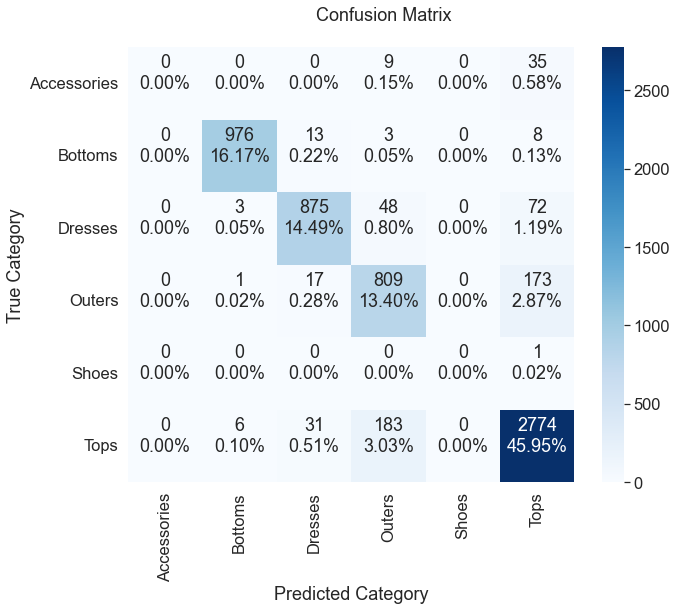

In [518]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion(cf_matrix):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.5)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(6,6)
    x_axis_labels = ['Accessories', 'Bottoms', 'Dresses', 'Outers', 'Shoes','Tops']
    y_axis_labels = ['Accessories', 'Bottoms', 'Dresses', 'Outers', 'Shoes','Tops']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues' ,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('             Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


cm = confusion_matrix(test_clothes.medium_label,test_clothes.model2_medium_prediction) 
plot_confusion(cm)

### Biggest errors on the "Clothes" model are tops-as-outers and outers-as-tops
Outers are currently not getting further modeling, they just go to "Coats"

### Should we change hirarchy to move coats into the tops model?
The 173 errors are similar to the total coats errors on the flat model

### Being able to plot images of misclassifications would be helpful

### Also note accessories and shoes are zero's because they are goods, this graphic could be cleaned up by removing those

## Split Test Clothes into Tops for further modeling vs. others that just need fine label added

In [405]:
test_clothes_other = test_clothes[test_clothes.model2_medium_prediction != "Tops"]
test_clothes_other.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.141176,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers


### The others, have completed predictions, add fine labels to dataframe
Recap from Above:
If model2_clothes = Bottoms then model2.fine_label = Trouser
If model2_clothes = Dresses then model2.fine_label = Dress
If model2_clothes = Outers then model2.fine_label = Coat

In [406]:
test_clothes_other['model2_fine_prediction'] = ''
test_clothes_other.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/1128153151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other['model2_fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,


In [407]:
clothes_other_mapping = {'Bottoms': 'Trouser', 'Dresses': 'Dress', 'Outers': 'Coat'}
test_clothes_other['model2_fine_prediction']= test_clothes_other['model2_medium_prediction'].map(clothes_other_mapping)
test_clothes_other

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/1546914979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other['model2_fine_prediction']= test_clothes_other['model2_medium_prediction'].map(clothes_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,Coat
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,Coat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6030,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Dresses,Dress
6034,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6035,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser


In [408]:
test_clothes_other.shape

(2974, 791)

### Split test tops for next layer of modeling

In [409]:
test_tops = test_clothes[test_clothes.model2_medium_prediction == "Tops"]
test_tops_flattened = test_tops.iloc[:,4:784].values
test_tops.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction
0,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0,Clothes,Tops
3,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops
6,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0,Clothes,Tops
11,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.058824,0.478431,0.443137,0.317647,0.0,0.0,Clothes,Tops
12,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops


## Make predictions with the Tops sub-model

In [410]:
model2_tops_probbability_model = tf.keras.Sequential([model2_tops, tf.keras.layers.Softmax()])
model2_tops_predictions = model2_tops_probbability_model.predict(test_tops_flattened)
model2_tops_prediction_label = np.argmax(model2_tops_predictions, axis=1)

2022-05-18 18:55:44.695393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [411]:
model2_tops_prediction_label[0:10]

array([1, 2, 2, 1, 1, 0, 1, 1, 2, 0])

In [412]:
model2_tops_prediction_label.shape

(3063,)

tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2} <br>


In [413]:
import pandas as pd

model2_tops_prediction_labels = pd.DataFrame(model2_tops_prediction_label)
model2_tops_prediction_labels = model2_tops_prediction_labels.rename(columns={model2_tops_prediction_labels.columns[0]: 'model2_fine_prediction'})

tops_mapping = {0: 'T-shirt/top', 1: 'Pullover', 2: 'Shirt'}
model2_tops_prediction_labels['model2_fine_prediction']= model2_tops_prediction_labels['model2_fine_prediction'].map(tops_mapping)

model2_tops_prediction_labels.head(10)

,model2_fine_prediction
0,Pullover
1,Shirt
2,Shirt
3,Pullover
4,Pullover
5,T-shirt/top
6,Pullover
7,Pullover
8,Shirt
9,T-shirt/top


In [414]:
test_tops.shape

(3063, 790)

In [415]:
model2_tops_prediction_labels.shape

(3063, 1)

merge predictions

In [416]:
test_tops.reset_index(drop=True, inplace=True)
model2_tops_prediction_labels.reset_index(drop=True, inplace=True)
test_tops = pd.concat([test_tops, model2_tops_prediction_labels], axis=1)
test_tops.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
3058,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.011765,...,0.000000,0.000000,0.011765,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
3059,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.317647,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
3060,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
3061,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.525490,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
3062,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,Shirt


In [417]:
test_tops.shape

(3063, 791)

### The Clothes branch of the network is now complete
### Start the Goods branch of the network

In [418]:
test_goods.head()
#test_goods_flattened


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model2_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods


In [419]:
model2_goods_probbability_model = tf.keras.Sequential([model2_goods, tf.keras.layers.Softmax()])
model2_goods_predictions = model2_goods_probbability_model.predict(test_goods_flattened)
model2_goods_prediction_label = np.argmax(model2_goods_predictions, axis=1)

2022-05-18 18:55:45.474943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [420]:
model2_goods_prediction_label[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [421]:
model2_goods_prediction_label.shape

(3963,)

goods_ints = {'Shoes': 0, 'Accessories': 1} <br>

In [422]:
import pandas as pd

model2_goods_prediction_labels = pd.DataFrame(model2_goods_prediction_label)
model2_goods_prediction_labels = model2_goods_prediction_labels.rename(columns={model2_goods_prediction_labels.columns[0]: 'model2_medium_prediction'})

goods_mapping = {0: 'Shoes', 1: 'Accessories'}
model2_goods_prediction_labels['model2_medium_prediction']= model2_goods_prediction_labels['model2_medium_prediction'].map(goods_mapping)

model2_goods_prediction_labels.head(10)


,model2_medium_prediction
0,Shoes
1,Shoes
2,Shoes
3,Shoes
4,Shoes
5,Accessories
6,Shoes
7,Shoes
8,Shoes
9,Shoes


In [423]:
model2_goods_prediction_labels.shape

(3963, 1)

In [424]:
test_goods.shape

(3963, 789)

In [425]:
test_goods.reset_index(drop=True, inplace=True)
model2_goods_prediction_labels.reset_index(drop=True, inplace=True)
test_goods = pd.concat([test_goods, model2_goods_prediction_labels], axis=1)
test_goods.tail()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction
3958,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3959,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3960,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3961,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3962,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


In [426]:
print(test_goods['model2_medium_prediction'].value_counts())
print("Total = ", test_goods.shape[0])


Shoes          3006
Accessories     957
Name: model2_medium_prediction, dtype: int64
Total =  3963


## Split Test Goods into Shoes for further modeling vs. Accessories that just need fine label added

In [427]:
test_goods_other = test_goods[test_goods.model2_medium_prediction != "Shoes"]
test_goods_other.head()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.721569,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories


In [428]:
test_goods_other['model2_fine_prediction'] = ''
test_goods_other.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/4045151764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other['model2_fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories,
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories,


In [429]:
goods_other_mapping = {'Accessories': 'Bag'}
test_goods_other['model2_fine_prediction']= test_goods_other['model2_medium_prediction'].map(goods_other_mapping)
test_goods_other.head()


/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/1189069370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other['model2_fine_prediction']= test_goods_other['model2_medium_prediction'].map(goods_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,Bag
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories,Bag


## Make predictions with Shoes model

In [430]:
test_shoes = test_goods[test_goods.model2_medium_prediction == "Shoes"]
test_shoes_flattened = test_shoes.iloc[:,4:784].values
test_shoes.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
1,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
2,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
4,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


In [431]:
model2_shoes_probbability_model = tf.keras.Sequential([model2_shoes, tf.keras.layers.Softmax()])
model2_shoes_predictions = model2_shoes_probbability_model.predict(test_shoes_flattened)
model2_shoes_prediction_label = np.argmax(model2_shoes_predictions, axis=1)


2022-05-18 18:55:50.419372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [432]:
model2_shoes_prediction_label[0:10]

array([0, 2, 1, 2, 2, 2, 1, 2, 0, 1])

In [433]:
model2_shoes_prediction_label.shape

(3006,)

shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2} <br>

In [434]:
import pandas as pd

model2_shoes_prediction_labels = pd.DataFrame(model2_shoes_prediction_label)
model2_shoes_prediction_labels = model2_shoes_prediction_labels.rename(columns={model2_shoes_prediction_labels.columns[0]: 'model2_fine_prediction'})

shoes_mapping = {0: 'Ankle boot', 1: 'Sneaker', 2: 'Sandal'}
model2_shoes_prediction_labels['model2_fine_prediction']= model2_shoes_prediction_labels['model2_fine_prediction'].map(shoes_mapping)

model2_shoes_prediction_labels.head(10)


,model2_fine_prediction
0,Ankle boot
1,Sandal
2,Sneaker
3,Sandal
4,Sandal
5,Sandal
6,Sneaker
7,Sandal
8,Ankle boot
9,Sneaker


In [435]:
test_shoes.shape

(3006, 790)

In [436]:
model2_shoes_prediction_labels.shape

(3006, 1)

In [437]:
test_shoes.reset_index(drop=True, inplace=True)
model2_shoes_prediction_labels.reset_index(drop=True, inplace=True)
test_shoes = pd.concat([test_shoes, model2_shoes_prediction_labels], axis=1)
test_shoes.tail()


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
3001,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3003,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3004,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3005,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal


In [438]:
test_shoes.shape

(3006, 791)

Completed Prediction dataframes to be merged for completed tables <br>
test_clothes_other <br>
test_tops <br>
test_goods_other <br>
test_shoes


In [439]:
model2_all_predictions = pd.concat([test_clothes_other, test_tops, test_goods_other, test_shoes])
model2_all_predictions.shape


(10000, 791)

In [440]:
model2_all_predictions.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model2_coarse_prediction,model2_medium_prediction,model2_fine_prediction
3001,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3003,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3004,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3005,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal


Check Accuracy on Test Predictions

In [441]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model2_fine_accuracy = accuracy_score(model2_all_predictions.fine_label, model2_all_predictions.model2_fine_prediction)
model2_medium_accuracy = accuracy_score(model2_all_predictions.medium_label, model2_all_predictions.model2_medium_prediction)
model2_coarse_accuracy = accuracy_score(model2_all_predictions.coarse_label, model2_all_predictions.model2_coarse_prediction)

print("Fine Level Accuracy = ",model2_fine_accuracy)
print("Medium Level Accuracy = ",model2_medium_accuracy)
print("Coarse Level Accuracy = ",model2_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(model2_all_predictions.fine_label,model2_all_predictions.model2_fine_prediction))
print("\n")
print("Medium Level Classification Report \n",classification_report(model2_all_predictions.medium_label,model2_all_predictions.model2_medium_prediction))
print("\n")
print("Coarse Level Classification Report \n",classification_report(model2_all_predictions.coarse_label,model2_all_predictions.model2_coarse_prediction))

Fine Level Accuracy =  0.882
Medium Level Accuracy =  0.938
Coarse Level Accuracy =  0.9947


Fine Level Classification Report 
               precision    recall  f1-score   support

  Ankle boot       0.97      0.94      0.96      1000
         Bag       0.99      0.95      0.97      1000
        Coat       0.77      0.81      0.79      1000
       Dress       0.93      0.88      0.90      1000
    Pullover       0.81      0.77      0.78      1000
      Sandal       0.94      0.98      0.96      1000
       Shirt       0.67      0.73      0.70      1000
     Sneaker       0.95      0.94      0.95      1000
 T-shirt/top       0.84      0.85      0.84      1000
     Trouser       0.99      0.98      0.98      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



Medium Level Classification Report 
               precision    recall  f1-score   support

 Accessories      

Compared to Model 1 results below

In [442]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model1_fine_accuracy = accuracy_score(test_labels.fine_label, model1_prediction_labels.fine_prediction)
model1_medium_accuracy = accuracy_score(test_labels.medium_label, model1_prediction_labels.medium_prediction)
model1_coarse_accuracy = accuracy_score(test_labels.coarse_label, model1_prediction_labels.coarse_prediction)

print("Fine Level Accuracy = ",model1_fine_accuracy)
print("Medium Level Accuracy = ",model1_medium_accuracy)
print("Coarse Level Accuracy = ",model1_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(test_labels.fine_label,model1_prediction_labels.fine_prediction))
print("\n")
print("Medium Level Classification Report \n",classification_report(test_labels.medium_label,model1_prediction_labels.medium_prediction))
print("\n")
print("Coarse Level Classification Report \n",classification_report(test_labels.coarse_label,model1_prediction_labels.coarse_prediction))


Fine Level Accuracy =  0.8888
Medium Level Accuracy =  0.938
Coarse Level Accuracy =  0.9959


Fine Level Classification Report 
               precision    recall  f1-score   support

  Ankle boot       0.97      0.96      0.96      1000
         Bag       0.99      0.97      0.98      1000
        Coat       0.78      0.84      0.81      1000
       Dress       0.86      0.90      0.88      1000
    Pullover       0.80      0.80      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.72      0.71      0.71      1000
     Sneaker       0.95      0.96      0.95      1000
 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       1.00      0.96      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Medium Level Classification Report 
               precision    recall  f1-score   support

 Accessories     

In [443]:
model2_train_time = model2_coarse__train_time + model2_clothes_train_time + model2_goods_train_time + model2_tops_train_time + model2_shoes_train_time

In [444]:
summary.loc[len(summary.index)] = ["2-HNN", round(model2_train_time.total_seconds()), model2_coarse_accuracy*100, model2_medium_accuracy*100, model2_fine_accuracy*100]
summary

,Model,Train Time,Coarse Acc,Medium Acc,Fine Acc
0,1-Flat,88,99.59,93.8,88.88
1,2-HNN,197,99.47,93.8,88.20


## Model 3: Flat NN with early stopping for epochs

Define early stopping criteria using validation set for monitoring

In [445]:
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=3,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [446]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [447]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [448]:
from tensorflow.keras.callbacks import TensorBoard
from time import time
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [449]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [450]:
from datetime import datetime

model3_start_time = datetime.now()
model3.fit(train100_images_flattened, np.asarray(train100.label), validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model3_end_time = datetime.now()
model3_train_time = model3_end_time - model3_start_time
print("Model 3 Training Time = ",model3_train_time)

Epoch 1/200
   7/1688 [..............................] - ETA: 14s - loss: 2.0152 - accuracy: 0.3661 

2022-05-18 18:55:53.297689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.5052 - accuracy: 0.8230

2022-05-18 18:56:01.103601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 9s 5ms/step - loss: 0.5052 - accuracy: 0.8230 - val_loss: 0.3922 - val_accuracy: 0.8592
Epoch 2/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3828 - accuracy: 0.8620 - val_loss: 0.3656 - val_accuracy: 0.8758
Epoch 3/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3397 - accuracy: 0.8768 - val_loss: 0.3404 - val_accuracy: 0.8802
Epoch 4/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3146 - accuracy: 0.8841 - val_loss: 0.3300 - val_accuracy: 0.8825
Epoch 5/200
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2968 - accuracy: 0.8903 - val_loss: 0.3567 - val_accuracy: 0.8687
Epoch 6/200
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2830 - accuracy: 0.8953 - val_loss: 0.3317 - val_accuracy: 0.8828
Epoch 7/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2700 - accuracy: 0.9006 - val_loss: 0.3115 - val_accuracy: 0.8

In [451]:
model3_probbabilities = tf.keras.Sequential([model3, tf.keras.layers.Softmax()])
model3_predictions = model3_probbabilities.predict(test_images_flattened)
model3_prediction_label = np.argmax(model3_predictions, axis=1)

2022-05-18 18:58:25.643851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [452]:
import pandas as pd

model3_prediction_labels = pd.DataFrame(model3_prediction_label)
model3_prediction_labels = model3_prediction_labels.rename(columns={model3_prediction_labels.columns[0]: 'label'})

model3_prediction_labels['fine_prediction'] = replace_all(model3_prediction_labels['label'], d)
model3_prediction_labels['medium_prediction']= model3_prediction_labels['fine_prediction'].map(medium_dictionary)
model3_prediction_labels['coarse_prediction']= model3_prediction_labels['medium_prediction'].map(coarse_dictionary)

model3_prediction_labels.head(10)

,label,fine_prediction,medium_prediction,coarse_prediction
0,9,Ankle boot,Shoes,Goods
1,2,Pullover,Tops,Clothes
2,1,Trouser,Bottoms,Clothes
3,1,Trouser,Bottoms,Clothes
4,6,Shirt,Tops,Clothes
5,1,Trouser,Bottoms,Clothes
6,4,Coat,Outers,Clothes
7,6,Shirt,Tops,Clothes
8,5,Sandal,Shoes,Goods
9,7,Sneaker,Shoes,Goods


In [453]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model3_fine_accuracy = accuracy_score(test_labels.fine_label, model3_prediction_labels.fine_prediction)
model3_medium_accuracy = accuracy_score(test_labels.medium_label, model3_prediction_labels.medium_prediction)
model3_coarse_accuracy = accuracy_score(test_labels.coarse_label, model3_prediction_labels.coarse_prediction)

print("Fine Level Accuracy = ",model3_fine_accuracy)
print("Medium Level Accuracy = ",model3_medium_accuracy)
print("Coarse Level Accuracy = ",model3_coarse_accuracy)
print("\n")
print("Fine Level Classification Report \n",classification_report(test_labels.fine_label,model3_prediction_labels.fine_prediction, 
                            target_names=class_names))

Fine Level Accuracy =  0.8752
Medium Level Accuracy =  0.9354
Coarse Level Accuracy =  0.9942


Fine Level Classification Report 
               precision    recall  f1-score   support

 T-shirt/top       0.96      0.94      0.95      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.78      0.81      0.80      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.71      0.63      0.67      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.77      0.87      0.82      1000
  Ankle boot       0.99      0.97      0.98      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [454]:
summary.loc[len(summary.index)] = ["3-Flat", round(model3_train_time.total_seconds()), model3_coarse_accuracy*100, model3_medium_accuracy*100, model3_fine_accuracy*100]
summary

,Model,Train Time,Coarse Acc,Medium Acc,Fine Acc
0,1-Flat,88,99.59,93.80,88.88
1,2-HNN,197,99.47,93.80,88.20
2,3-Flat,153,99.42,93.54,87.52


## Model 4: HNN with early stopping for epochs

Coarse Level Model

In [455]:
model4_coarse = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model4_coarse.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [456]:
coarse_ints = {'Clothes': 0, 'Goods': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_course_labels = np.asarray(train100['coarse_label'].map(coarse_ints))
#model4_course_val_labels = np.asarray(validation10['coarse_label'].map(coarse_ints))

In [457]:
from datetime import datetime

model4_coarse_start_time = datetime.now()
model4_coarse.fit(train100_images_flattened, model4_course_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_coarse__end_time = datetime.now()
model4_coarse__train_time = model4_coarse__end_time - model4_coarse_start_time
print("Model-4-Coarse Training Time = ",model4_coarse__train_time)

# validation_split=0.1
# validation_data=[validation10_images_flattened, model4_course_val_labels]

Epoch 1/200
   1/1688 [..............................] - ETA: 9:27 - loss: 0.6800 - accuracy: 0.5938

2022-05-18 18:58:27.388284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1684/1688 [============================>.] - ETA: 0s - loss: 0.0397 - accuracy: 0.9891

2022-05-18 18:58:35.463677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 9s 5ms/step - loss: 0.0396 - accuracy: 0.9892 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 2/200
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0197 - val_accuracy: 0.9938
Epoch 3/200
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.0162 - val_accuracy: 0.9952
Epoch 4/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0168 - val_accuracy: 0.9952
Epoch 5/200
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0162 - val_accuracy: 0.9943
Epoch 6/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0181 - val_accuracy: 0.9942
Epoch 7/200
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0180 - val_accuracy: 0.9

Clothes Model

In [458]:
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_clothes_labels = np.asarray(train100_clothes['medium_label'].map(clothes_ints))

In [459]:
model4_clothes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

model4_clothes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [460]:
from datetime import datetime

model4_clothes_start_time = datetime.now()
model4_clothes.fit(train100_clothes_flattened, model4_clothes_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_clothes_end_time = datetime.now()
model4_clothes_train_time = model4_clothes_end_time - model4_clothes_start_time
print("Model-4-Clothes Training Time = ",model4_clothes_train_time)

Epoch 1/200
   1/1013 [..............................] - ETA: 5:46 - loss: 1.3058 - accuracy: 0.5000

2022-05-18 19:00:57.741781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1013/1013 [==============================] - ETA: 0s - loss: 0.3667 - accuracy: 0.8578

2022-05-18 19:01:03.133554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1013/1013 [==============================] - 6s 6ms/step - loss: 0.3667 - accuracy: 0.8578 - val_loss: 0.3047 - val_accuracy: 0.8867
Epoch 2/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2881 - accuracy: 0.8899 - val_loss: 0.3221 - val_accuracy: 0.8669
Epoch 3/200
1013/1013 [==============================] - 6s 6ms/step - loss: 0.2646 - accuracy: 0.8976 - val_loss: 0.2998 - val_accuracy: 0.8694
Epoch 4/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2487 - accuracy: 0.9054 - val_loss: 0.3177 - val_accuracy: 0.8783
Epoch 5/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2347 - accuracy: 0.9095 - val_loss: 0.2480 - val_accuracy: 0.9050
Epoch 6/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2249 - accuracy: 0.9148 - val_loss: 0.2447 - val_accuracy: 0.9064
Epoch 7/200
1013/1013 [==============================] - 5s 5ms/step - loss: 0.2150 - accuracy: 0.9190 - val_loss: 0.2548 - val_accuracy: 0.90

Goods Model

In [461]:
goods_ints = {'Shoes': 0, 'Accessories': 1}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_goods_labels = np.asarray(train100_goods['medium_label'].map(goods_ints))

In [462]:
model4_goods = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model4_goods.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [463]:
from datetime import datetime

model4_goods_start_time = datetime.now()
model4_goods.fit(train100_goods_flattened, model4_goods_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_goods_end_time = datetime.now()
model4_goods_train_time = model4_goods_end_time - model4_goods_start_time
print("Model-4-Goods Training Time = ",model4_goods_train_time)

Epoch 1/200
 11/675 [..............................] - ETA: 3s - loss: 0.3207 - accuracy: 0.9006  

2022-05-18 19:03:06.553431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


669/675 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9933

2022-05-18 19:03:09.241481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - 3s 4ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 0.0228 - val_accuracy: 0.9925
Epoch 2/200
675/675 [==============================] - 3s 5ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0146 - val_accuracy: 0.9946
Epoch 3/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0137 - val_accuracy: 0.9954
Epoch 4/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0162 - val_accuracy: 0.9950
Epoch 5/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0148 - val_accuracy: 0.9954
Epoch 6/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0168 - val_accuracy: 0.9958
Epoch 7/200
675/675 [==============================] - 3s 4ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0170 - val_accuracy: 0.9954
Epoch 8/200

Tops Model

In [464]:
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_tops_labels = np.asarray(train100_tops['fine_label'].map(tops_ints))

In [465]:
model4_tops = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model4_tops.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [466]:
from datetime import datetime

model4_tops_start_time = datetime.now()
model4_tops.fit(train100_tops_flattened, model4_tops_labels,  validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_tops_end_time = datetime.now()
model4_tops_train_time = model4_tops_end_time - model4_tops_start_time
print("Model-2-Tops Training Time = ",model4_tops_train_time)

Epoch 1/200
  1/507 [..............................] - ETA: 2:44 - loss: 1.2627 - accuracy: 0.2500

2022-05-18 19:04:04.059999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


507/507 [==============================] - ETA: 0s - loss: 0.5359 - accuracy: 0.7796

2022-05-18 19:04:07.211452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


507/507 [==============================] - 4s 6ms/step - loss: 0.5359 - accuracy: 0.7796 - val_loss: 0.4569 - val_accuracy: 0.8083
Epoch 2/200
507/507 [==============================] - 2s 5ms/step - loss: 0.4478 - accuracy: 0.8143 - val_loss: 0.4252 - val_accuracy: 0.8261
Epoch 3/200
507/507 [==============================] - 2s 5ms/step - loss: 0.4109 - accuracy: 0.8281 - val_loss: 0.4671 - val_accuracy: 0.8122
Epoch 4/200
507/507 [==============================] - 3s 5ms/step - loss: 0.3884 - accuracy: 0.8357 - val_loss: 0.4153 - val_accuracy: 0.8256
Epoch 5/200
507/507 [==============================] - 2s 5ms/step - loss: 0.3707 - accuracy: 0.8449 - val_loss: 0.3915 - val_accuracy: 0.8239
Epoch 6/200
507/507 [==============================] - 3s 5ms/step - loss: 0.3643 - accuracy: 0.8444 - val_loss: 0.3684 - val_accuracy: 0.8472
Epoch 7/200
507/507 [==============================] - 2s 5ms/step - loss: 0.3473 - accuracy: 0.8541 - val_loss: 0.3776 - val_accuracy: 0.8344
Epoch 8/200

Shoes Model

In [467]:
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2}

# Important note, the labels need to be of array type for tf or the training time increases significantly
model4_shoes_labels = np.asarray(train100_shoes['fine_label'].map(shoes_ints))

In [468]:
model4_shoes = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model4_shoes.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [469]:
from datetime import datetime

model4_shoes_start_time = datetime.now()
model4_shoes.fit(train100_shoes_flattened, model4_shoes_labels, validation_split=0.1, epochs=200, callbacks=[earlystop, tb])
model4_shoes_end_time = datetime.now()
model4_shoes_train_time = model4_shoes_end_time - model4_shoes_start_time
print("Model-2-Shoes Training Time = ",model4_shoes_train_time)

Epoch 1/200
  1/507 [..............................] - ETA: 2:33 - loss: 1.5114 - accuracy: 0.2188

2022-05-18 19:05:06.938682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


504/507 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.9070

2022-05-18 19:05:09.379149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


507/507 [==============================] - 3s 5ms/step - loss: 0.2589 - accuracy: 0.9070 - val_loss: 0.1627 - val_accuracy: 0.9406
Epoch 2/200
507/507 [==============================] - 3s 5ms/step - loss: 0.1550 - accuracy: 0.9454 - val_loss: 0.1483 - val_accuracy: 0.9472
Epoch 3/200
507/507 [==============================] - 3s 5ms/step - loss: 0.1272 - accuracy: 0.9557 - val_loss: 0.1516 - val_accuracy: 0.9489
Epoch 4/200
507/507 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.9587 - val_loss: 0.1521 - val_accuracy: 0.9422
Epoch 5/200
507/507 [==============================] - 2s 5ms/step - loss: 0.1020 - accuracy: 0.9644 - val_loss: 0.1602 - val_accuracy: 0.9433
Epoch 6/200
507/507 [==============================] - 2s 5ms/step - loss: 0.0937 - accuracy: 0.9657 - val_loss: 0.1447 - val_accuracy: 0.9544
Epoch 7/200
507/507 [==============================] - 2s 5ms/step - loss: 0.0845 - accuracy: 0.9696 - val_loss: 0.1353 - val_accuracy: 0.9539
Epoch 8/200

## Make Predictions using pipeline of Model 4 subnetworks

**To recap the model output dictionaries are:** <br>
coarse_ints = {'Clothes': 0, 'Goods': 1} <br>
clothes_ints = {'Tops': 0, 'Dresses': 1, 'Bottoms': 2, 'Outers': 3} <br>
goods_ints = {'Shoes': 0, 'Accessories': 1} <br>
tops_ints = {'T-shirt/top': 0, 'Pullover': 1, 'Shirt': 2} <br>
shoes_ints = {'Ankle boot': 0, 'Sneaker': 1, 'Sandal': 2} <br>

coarse predictions

In [470]:
del test_clothes_other4
del test_tops4
del test_goods_other4
del test_shoes4

In [471]:

test4 = test.iloc[:,0:788].copy()
test_images_flattened4 = test_images_flattened
test4

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9996,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9997,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.105882,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9998,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [472]:
model4_coarse_probbability_model = tf.keras.Sequential([model4_coarse, tf.keras.layers.Softmax()])
model4_coarse_predictions = model4_coarse_probbability_model.predict(test_images_flattened4)
model4_coarse_prediction_label = np.argmax(model4_coarse_predictions, axis=1)

2022-05-18 19:05:53.002050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [473]:
import pandas as pd

model4_coarse_prediction_labels = pd.DataFrame(model4_coarse_prediction_label)
model4_coarse_prediction_labels = model4_coarse_prediction_labels.rename(columns={model4_coarse_prediction_labels.columns[0]: 'model4_coarse_prediction'})

coarse_mapping = {0: 'Clothes', 1: 'Goods'}
model4_coarse_prediction_labels['model4_coarse_prediction']= model4_coarse_prediction_labels['model4_coarse_prediction'].map(coarse_mapping)

model4_coarse_prediction_labels.head(10)

,model4_coarse_prediction
0,Goods
1,Clothes
2,Clothes
3,Clothes
4,Clothes
5,Clothes
6,Clothes
7,Clothes
8,Goods
9,Goods


In [474]:
test4 = pd.concat([test4, model4_coarse_prediction_labels], axis=1)
test4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


### Split test set into Clothes vs. Goods to feed into next level of model predictions

In [475]:
test_clothes4 = test4[test4.model4_coarse_prediction == "Clothes"]
test_clothes_flattened4 = test_clothes4.iloc[:,4:784].values
test_clothes4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [476]:
test_goods4 = test4[test4.model4_coarse_prediction == "Goods"]
test_goods_flattened4 = test_goods4.iloc[:,4:784].values
test_goods4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods


### Make predictions with Clothes sub-model

In [477]:
model4_clothes_probbability_model = tf.keras.Sequential([model4_clothes, tf.keras.layers.Softmax()])
model4_clothes_predictions = model4_clothes_probbability_model.predict(test_clothes_flattened4)
model4_clothes_prediction_label = np.argmax(model4_clothes_predictions, axis=1)

2022-05-18 19:05:53.762203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [478]:
import pandas as pd

model4_clothes_prediction_labels = pd.DataFrame(model4_clothes_prediction_label)
model4_clothes_prediction_labels = model4_clothes_prediction_labels.rename(columns={model4_clothes_prediction_labels.columns[0]: 'model4_medium_prediction'})

clothes_mapping = {0: 'Tops', 1: 'Dresses', 2: 'Bottoms', 3: 'Outers'}
model4_clothes_prediction_labels['model4_medium_prediction']= model4_clothes_prediction_labels['model4_medium_prediction'].map(clothes_mapping)

model4_clothes_prediction_labels.head(10)

,model4_medium_prediction
0,Tops
1,Bottoms
2,Bottoms
3,Tops
4,Bottoms
5,Outers
6,Tops
7,Outers
8,Dresses
9,Outers


In [479]:
print(test_clothes4.shape)
test_clothes4

(6007, 789)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
1,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.011765,0.000000,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,Clothes
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.227451,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
3,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
4,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.047059,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
5,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.505882,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.525490,0.560784,0.180392,0.000000,0.0,0.0,0.0,Clothes
9991,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
9994,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes
9996,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes


In [480]:
print(model4_clothes_prediction_labels.shape)
model4_clothes_prediction_labels

(6007, 1)


,model4_medium_prediction
0,Tops
1,Bottoms
2,Bottoms
3,Tops
4,Bottoms
...,...
6002,Tops
6003,Tops
6004,Bottoms
6005,Bottoms


### Merge Clothes predictions back to test_clothes dataframe

In [481]:
test_clothes4.reset_index(drop=True, inplace=True)
model4_clothes_prediction_labels.reset_index(drop=True, inplace=True)
test_clothes4 = pd.concat([test_clothes4, model4_clothes_prediction_labels], axis=1)
test_clothes4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
6002,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.52549,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops
6003,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops
6004,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6005,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms
6006,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Bottoms


## Split Test Clothes into Tops for further modeling vs. others that just need fine label added

In [482]:
test_clothes_other4 = test_clothes4[test_clothes4.model4_medium_prediction != "Tops"]
test_clothes_other4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243137,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.141176,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers


### The others, have completed predictions, add fine labels to dataframe
Recap from Above:
If model2_clothes = Bottoms then model2.fine_label = Trouser
If model2_clothes = Dresses then model2.fine_label = Dress
If model2_clothes = Outers then model2.fine_label = Coat

In [483]:
test_clothes_other4['model4_fine_prediction'] = ''
test_clothes_other4.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/3410850626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other4['model4_fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,


In [484]:
clothes_other_mapping = {'Bottoms': 'Trouser', 'Dresses': 'Dress', 'Outers': 'Coat'}
test_clothes_other4['model4_fine_prediction']= test_clothes_other4['model4_medium_prediction'].map(clothes_other_mapping)
test_clothes_other4

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/2468961634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clothes_other4['model4_fine_prediction']= test_clothes_other4['model4_medium_prediction'].map(clothes_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,Coat
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,Coat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6000,3,Dress,Dresses,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Dresses,Dress
6004,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
6005,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser


### Split test tops for next layer of modeling

In [485]:
test_tops4 = test_clothes4[test_clothes4.model4_medium_prediction == "Tops"]
test_tops_flattened4 = test_tops4.iloc[:,4:784].values
test_tops4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
0,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.011765,0.682353,0.741176,0.262745,0.000000,0.0,0.0,Clothes,Tops
3,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.007843,0.0,0.003922,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops
6,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.137255,0.329412,0.215686,0.000000,0.000000,0.0,0.0,Clothes,Tops
11,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.058824,0.478431,0.443137,0.317647,0.0,0.0,Clothes,Tops
12,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,Clothes,Tops


## Make predictions with the Tops sub-model

In [486]:
model4_tops_probbability_model = tf.keras.Sequential([model4_tops, tf.keras.layers.Softmax()])
model4_tops_predictions = model4_tops_probbability_model.predict(test_tops_flattened4)
model4_tops_prediction_label = np.argmax(model4_tops_predictions, axis=1)

2022-05-18 19:05:54.847240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [487]:
import pandas as pd

model4_tops_prediction_labels = pd.DataFrame(model4_tops_prediction_label)
model4_tops_prediction_labels = model4_tops_prediction_labels.rename(columns={model4_tops_prediction_labels.columns[0]: 'model4_fine_prediction'})

tops_mapping = {0: 'T-shirt/top', 1: 'Pullover', 2: 'Shirt'}
model4_tops_prediction_labels['model4_fine_prediction']= model4_tops_prediction_labels['model4_fine_prediction'].map(tops_mapping)

model4_tops_prediction_labels.head(10)

,model4_fine_prediction
0,Pullover
1,Shirt
2,Shirt
3,Pullover
4,Pullover
5,T-shirt/top
6,Pullover
7,Pullover
8,Shirt
9,T-shirt/top


In [488]:
test_tops4.reset_index(drop=True, inplace=True)
model4_tops_prediction_labels.reset_index(drop=True, inplace=True)
test_tops4 = pd.concat([test_tops4, model4_tops_prediction_labels], axis=1)
test_tops4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
3015,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.011765,...,0.000000,0.000000,0.011765,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
3016,0,T-shirt/top,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.317647,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,T-shirt/top
3017,2,Pullover,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
3018,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.525490,0.560784,0.180392,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover
3019,6,Shirt,Tops,Clothes,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Clothes,Tops,Pullover


### The Clothes branch of the network is now complete
### Start the Goods branch of the network

In [489]:
model4_goods_probbability_model = tf.keras.Sequential([model4_goods, tf.keras.layers.Softmax()])
model4_goods_predictions = model4_goods_probbability_model.predict(test_goods_flattened4)
model4_goods_prediction_label = np.argmax(model4_goods_predictions, axis=1)

2022-05-18 19:05:55.320771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [490]:
import pandas as pd

model4_goods_prediction_labels = pd.DataFrame(model4_goods_prediction_label)
model4_goods_prediction_labels = model4_goods_prediction_labels.rename(columns={model4_goods_prediction_labels.columns[0]: 'model4_medium_prediction'})

goods_mapping = {0: 'Shoes', 1: 'Accessories'}
model4_goods_prediction_labels['model4_medium_prediction']= model4_goods_prediction_labels['model4_medium_prediction'].map(goods_mapping)

model4_goods_prediction_labels.head(10)

,model4_medium_prediction
0,Shoes
1,Shoes
2,Shoes
3,Shoes
4,Shoes
5,Accessories
6,Shoes
7,Shoes
8,Shoes
9,Shoes


In [491]:
test_goods4

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,775,776,777,778,779,780,781,782,783,model4_coarse_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
8,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
11,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
12,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066667,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9993,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9995,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods
9997,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods


In [492]:
test_goods4.reset_index(drop=True, inplace=True)
model4_goods_prediction_labels.reset_index(drop=True, inplace=True)
test_goods4 = pd.concat([test_goods4, model4_goods_prediction_labels], axis=1)
test_goods4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
3988,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3989,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3990,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3991,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3992,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


## Split Test Goods into Shoes for further modeling vs. Accessories that just need fine label added

In [493]:
test_goods_other4 = test_goods4[test_goods4.model4_medium_prediction != "Shoes"]
test_goods_other4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
3980,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3983,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3986,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3988,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories
3991,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories


In [494]:
test_goods_other4['model4_fine_prediction'] = ''
test_goods_other4.head()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/1691373491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other4['model4_fine_prediction'] = ''


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
5,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
10,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
11,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.015686,0.000000,0.0,0.0,0.0,Goods,Accessories,
12,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.713725,0.658824,0.000000,0.000000,0.0,0.0,0.0,Goods,Accessories,
20,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.043137,0.0,0.0,0.0,Goods,Accessories,


In [495]:
goods_other_mapping = {'Accessories': 'Bag'}
test_goods_other4['model4_fine_prediction']= test_goods_other4['model4_medium_prediction'].map(goods_other_mapping)
test_goods_other4.tail()

/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_99294/539409896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_goods_other4['model4_fine_prediction']= test_goods_other4['model4_medium_prediction'].map(goods_other_mapping)


,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
3980,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3983,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3986,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3988,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag
3991,8,Bag,Accessories,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Accessories,Bag


## Make predictions with Shoes model

In [496]:
test_shoes4 = test_goods4[test_goods4.model4_medium_prediction == "Shoes"]
test_shoes_flattened4 = test_shoes4.iloc[:,4:784].values
test_shoes4.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,776,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
1,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
2,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
3,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes
4,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goods,Shoes


In [497]:
model4_shoes_probbability_model = tf.keras.Sequential([model4_shoes, tf.keras.layers.Softmax()])
model4_shoes_predictions = model4_shoes_probbability_model.predict(test_shoes_flattened4)
model4_shoes_prediction_label = np.argmax(model4_shoes_predictions, axis=1)

2022-05-18 19:05:56.174965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [498]:
import pandas as pd

model4_shoes_prediction_labels = pd.DataFrame(model4_shoes_prediction_label)
model4_shoes_prediction_labels = model4_shoes_prediction_labels.rename(columns={model4_shoes_prediction_labels.columns[0]: 'model4_fine_prediction'})

shoes_mapping = {0: 'Ankle boot', 1: 'Sneaker', 2: 'Sandal'}
model4_shoes_prediction_labels['model4_fine_prediction']= model4_shoes_prediction_labels['model4_fine_prediction'].map(shoes_mapping)

model4_shoes_prediction_labels.head(10)

,model4_fine_prediction
0,Ankle boot
1,Sandal
2,Sneaker
3,Sandal
4,Sandal
5,Sandal
6,Sneaker
7,Sandal
8,Ankle boot
9,Sneaker


In [499]:
test_shoes4.reset_index(drop=True, inplace=True)
model4_shoes_prediction_labels.reset_index(drop=True, inplace=True)
test_shoes4 = pd.concat([test_shoes4, model4_shoes_prediction_labels], axis=1)
test_shoes4.tail()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
3001,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3003,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3004,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3005,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal


In [500]:
model4_all_predictions = pd.concat([test_clothes_other4, test_tops4, test_goods_other4, test_shoes4])
model4_all_predictions.shape

(10000, 791)

In [501]:
model4_all_predictions.isna().sum()

label                       0
fine_label                  0
medium_label                0
coarse_label                0
0                           0
                           ..
782                         0
783                         0
model4_coarse_prediction    0
model4_medium_prediction    0
model4_fine_prediction      0
Length: 791, dtype: int64

In [502]:
test_shoes4

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
0,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
1,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
2,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sneaker
3,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
4,7,Sneaker,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Sandal
3002,5,Sandal,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015686,0.0,0.313725,0.301961,0.0,0.0,0.0,Goods,Shoes,Sandal
3003,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot
3004,9,Ankle boot,Shoes,Goods,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,Goods,Shoes,Ankle boot


In [503]:
model4_all_predictions.head()

,label,fine_label,medium_label,coarse_label,0,1,2,3,4,5,...,777,778,779,780,781,782,783,model4_coarse_prediction,model4_medium_prediction,model4_fine_prediction
1,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
2,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
4,1,Trouser,Bottoms,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Clothes,Bottoms,Trouser
5,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117647,0.105882,0.105882,0.000000,0.0,0.0,0.0,Clothes,Outers,Coat
7,4,Coat,Outers,Clothes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113725,0.568627,0.537255,0.231373,0.0,0.0,0.0,Clothes,Outers,Coat


In [504]:
model4_all_predictions.model4_fine_prediction

1          Trouser
2          Trouser
4          Trouser
5             Coat
7             Coat
           ...    
3001        Sandal
3002        Sandal
3003    Ankle boot
3004    Ankle boot
3005        Sandal
Name: model4_fine_prediction, Length: 10000, dtype: object

In [505]:
model4_fine_accuracy = accuracy_score(model4_all_predictions.fine_label, model4_all_predictions.model4_fine_prediction)
model4_medium_accuracy = accuracy_score(model4_all_predictions.medium_label, model4_all_predictions.model4_medium_prediction)
model4_coarse_accuracy = accuracy_score(model4_all_predictions.coarse_label, model4_all_predictions.model4_coarse_prediction)



In [506]:
model4_train_time = model4_coarse__train_time + model4_clothes_train_time + model4_goods_train_time + model4_tops_train_time + model4_shoes_train_time
summary.loc[len(summary.index)] = ["4-HNN", round(model4_train_time.total_seconds()), model4_coarse_accuracy*100, model4_medium_accuracy*100, model4_fine_accuracy*100]
summary

,Model,Train Time,Coarse Acc,Medium Acc,Fine Acc
0,1-Flat,88,99.59,93.80,88.88
1,2-HNN,197,99.47,93.80,88.20
2,3-Flat,153,99.42,93.54,87.52
3,4-HNN,444,99.45,94.09,88.80


In [507]:
print("Fine Level Classification Report \n",classification_report(model4_all_predictions.fine_label,model4_all_predictions.model4_fine_prediction))
print("\n")
print("Medium Level Classification Report \n",classification_report(model4_all_predictions.medium_label,model4_all_predictions.model4_medium_prediction))
print("\n")
print("Coarse Level Classification Report \n",classification_report(model4_all_predictions.coarse_label,model4_all_predictions.model4_coarse_prediction))

Fine Level Classification Report 
               precision    recall  f1-score   support

  Ankle boot       0.94      0.97      0.96      1000
         Bag       0.98      0.96      0.97      1000
        Coat       0.80      0.81      0.81      1000
       Dress       0.91      0.88      0.89      1000
    Pullover       0.79      0.80      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
 T-shirt/top       0.82      0.85      0.84      1000
     Trouser       0.98      0.98      0.98      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Medium Level Classification Report 
               precision    recall  f1-score   support

 Accessories       0.98      0.96      0.97      1000
     Bottoms       0.98      0.98      0.98      1000
    